In [1]:
import numpy as np
import math

## [Problem 3-1]

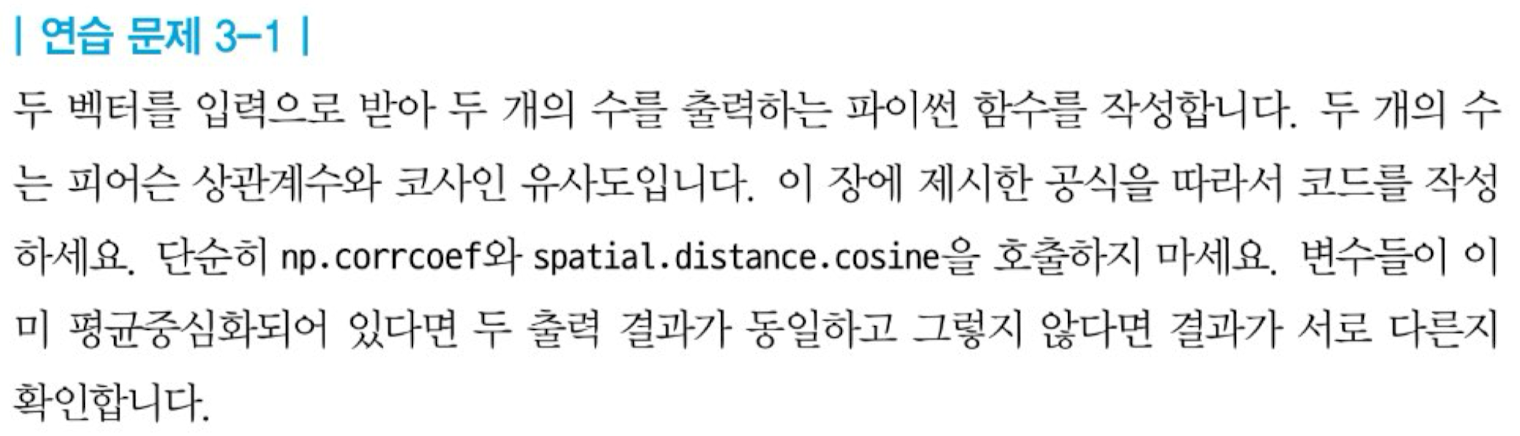

### Vectors input

In [15]:
np.random.seed(0)
x = np.random.randint(1, 20, 5)
y = np.random.randint(1, 20, 5)

print(f'x = {x}\ny = {y}')

x = [13 16  1  4  4]
y = [ 8 10 19  5  7]


### 1. Pearson correlation coefficient

In [24]:
def cal_pearson(x, y):
  x_tilde = x - np.mean(x)
  y_tilde = y - np.mean(y)

  numerator = np.dot(x_tilde, y_tilde)
  denominator = np.sqrt(np.dot(x_tilde, x_tilde) * np.dot(y_tilde, y_tilde))

  rho = numerator / denominator

  return rho

Pearson corr = -0.2920061117684397


In [25]:
rho = cal_pearson(x, y)

print(f'Pearson corr = {rho}')

Pearson corr = -0.2920061117684397


### 2. Cosine Simillarity

In [38]:
def cal_cos(x, y):
  alpha = np.dot(x, y)

  x_norm = np.sqrt(np.dot(x, x))
  y_norm = np.sqrt(np.dot(y, y))

  denominator = x_norm * y_norm

  cos_simm = alpha / denominator

  return cos_simm

In [39]:
cos_simm = cal_cos(x, y)

print(f'Cosine simmilarity = {cos_simm}')

Cosine simmilarity = 0.6319487273495624


### 3. Pearson VS Cosine

#### 3-1. mean-centering 되어 **있지 않은** 경우

In [40]:
print(f'Pearson corr = {rho}\nCosine simmilarity = {cos_simm}') # 다른 결과

Pearson corr = -0.2920061117684397
Cosine simmilarity = 0.6319487273495624


#### 3-2. mean-centering 되어 있는 경우

In [41]:
# Mean centering
x_tilde = x - np.mean(x)
y_tilde = y - np.mean(y)

cos_simm_centered = cal_cos(x_tilde, y_tilde)

In [42]:
print(f'Pearson corr = {rho}\nCosine simmilarity(Mean-centering) = {cos_simm_centered}') # 동일한 결과

Pearson corr = -0.2920061117684397
Cosine simmilarity(Mean-centering) = -0.29200611176843977


**즉, mean centering 된 변수인 경우, `피어슨 상관 관계 == 코사인 유사도`**

## Double-Check!

In [51]:
from scipy import spatial # cosine simm 계산을 위한 라이브러리

In [53]:
print(f'Pearson corr = {np.corrcoef(x, y)[0, 1]}\nCosine simmilarity = {1-spatial.distance.cosine(x,y)}')

Pearson corr = -0.29200611176843977
Cosine simmilarity = 0.6319487273495623


## [Problem 3-2]

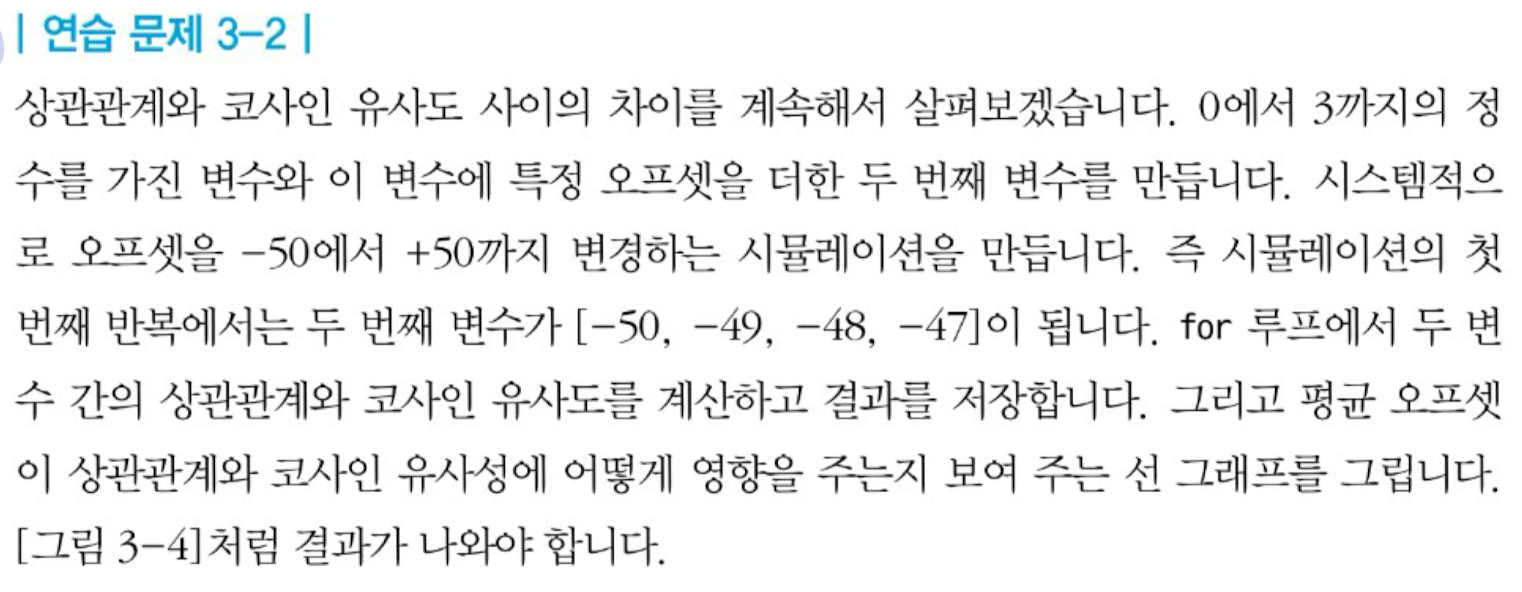

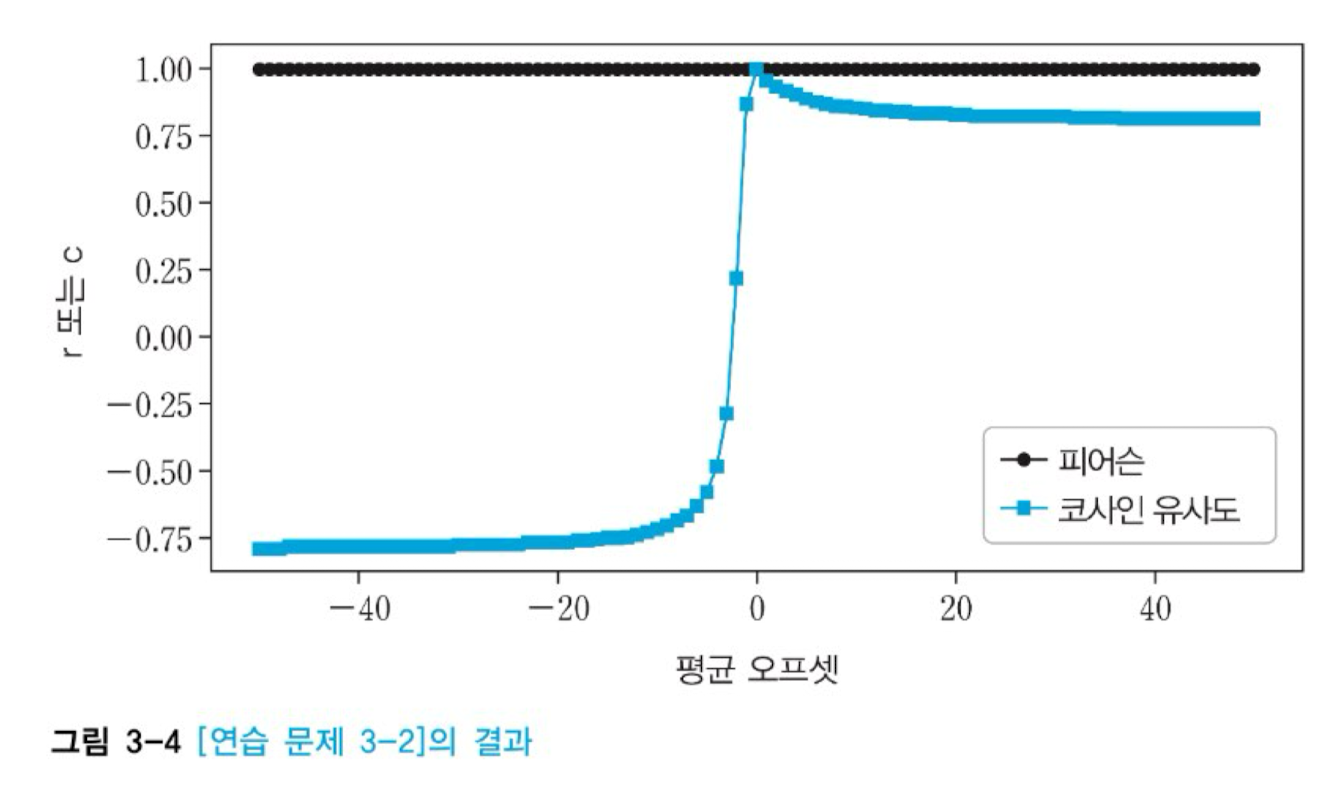

### 1. Vectors input

In [46]:
v = np.arange(0, 4)
v_plus1 = np.arange(0, 4) + 1

### 2. Offset for loop

In [66]:
offset = []
l_pearson = []
l_cos = []

for i in range(-50, 50+1):
  # assign offset
  offset.append(i)

  # Calcuating Pearson & Cosine-simm
  l_pearson.append(cal_pearson(v, v+i))
  l_cos.append(cal_cos(v, v+i))

# print(l_pearson)

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

### 3. Visualization

In [67]:
import matplotlib.pyplot as plt

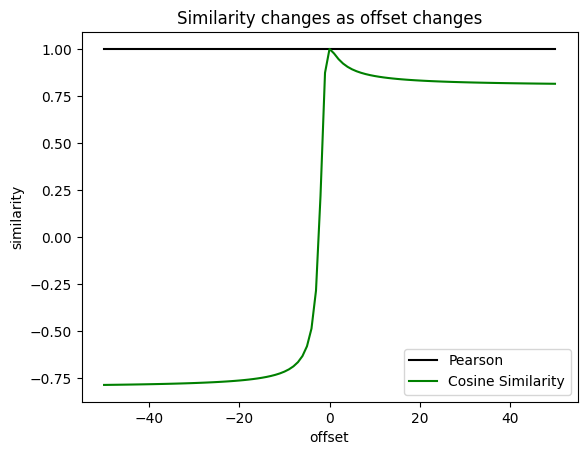

In [75]:
plt.plot(offset, l_pearson, 'black', label='Pearson')
plt.plot(offset, l_cos, 'g-', label='Cosine Similarity')
plt.xlabel('offset')
plt.ylabel('similarity')
plt.title('Similarity changes as offset changes')
plt.legend()

plt.show()

## [Problem 3-5]

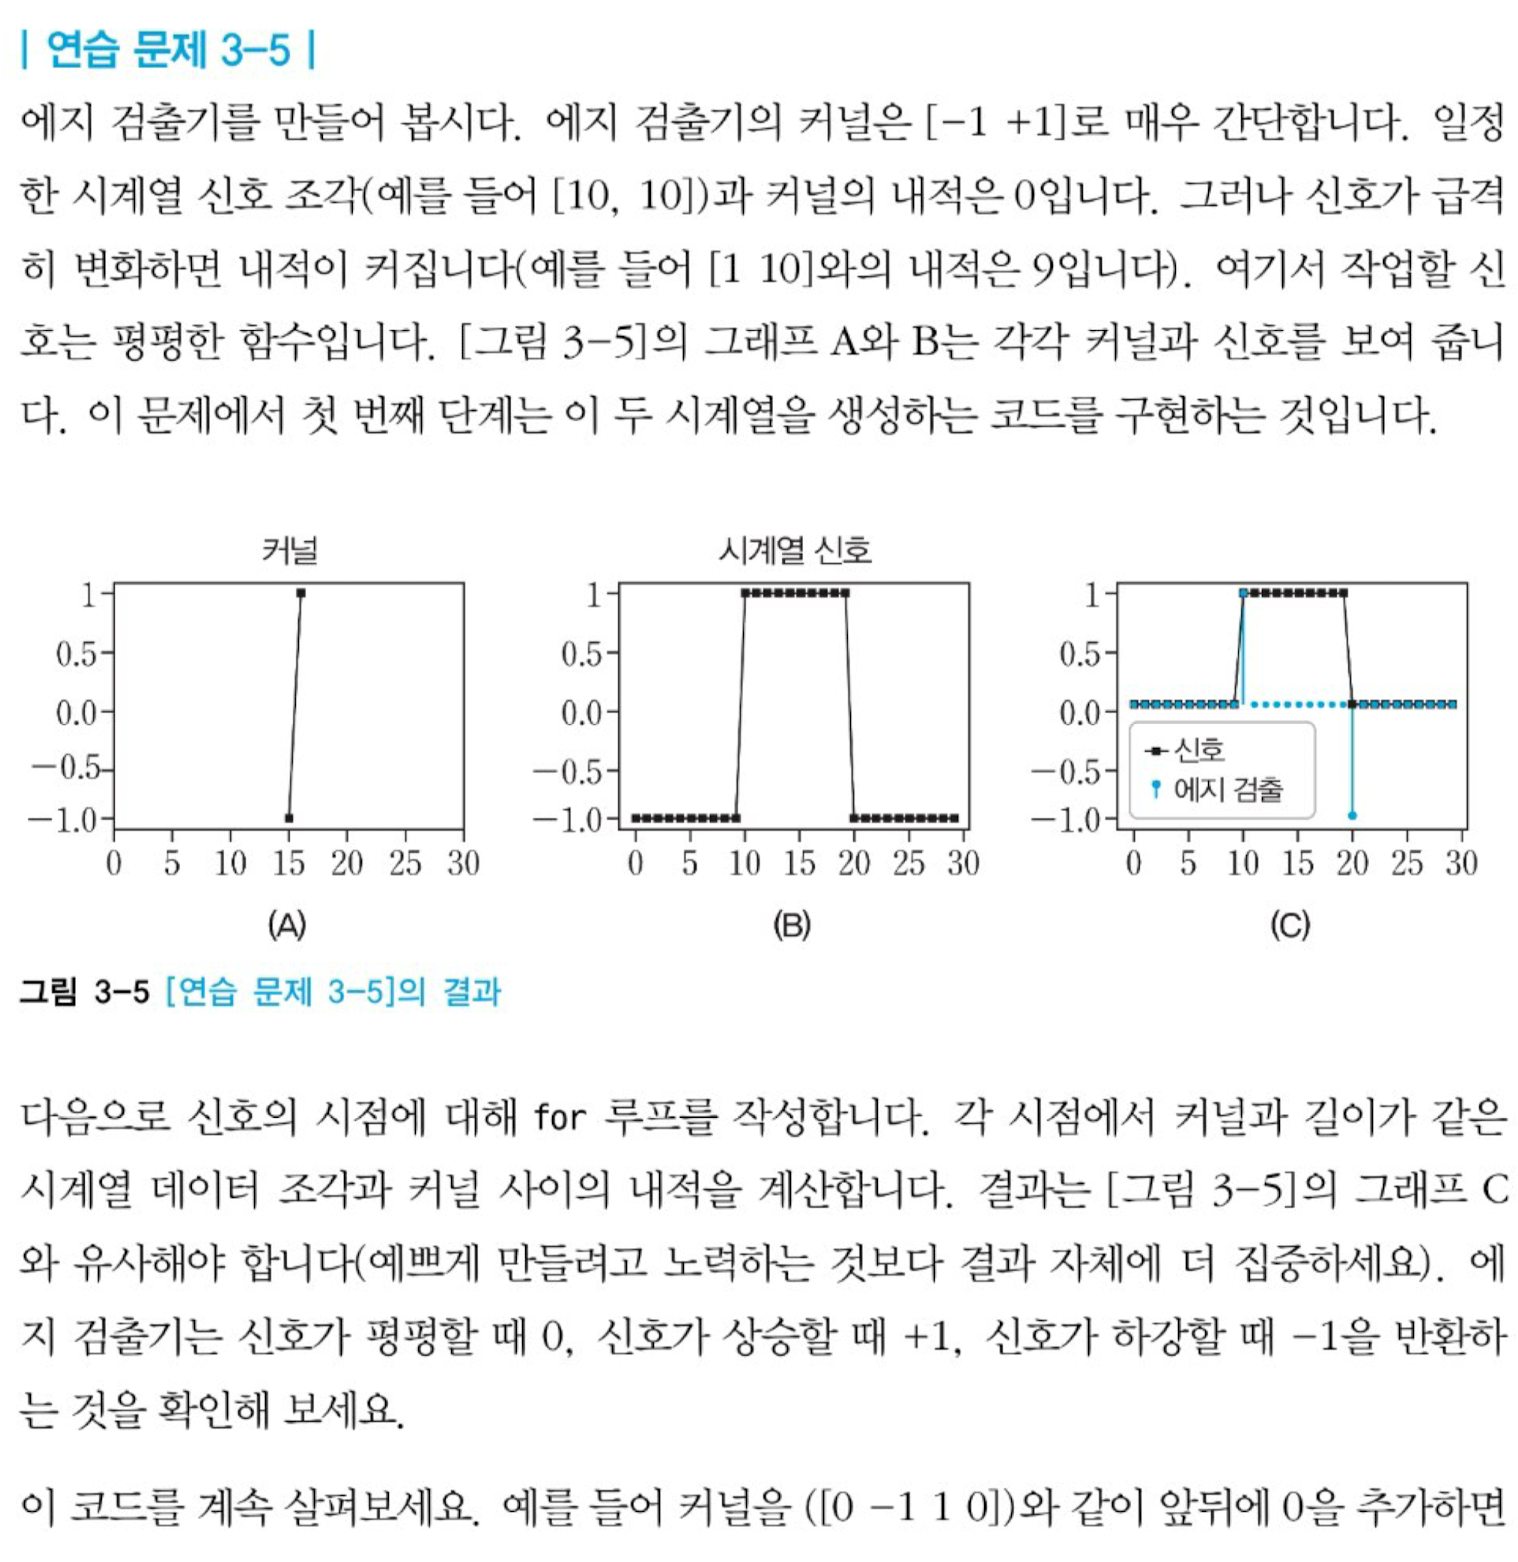

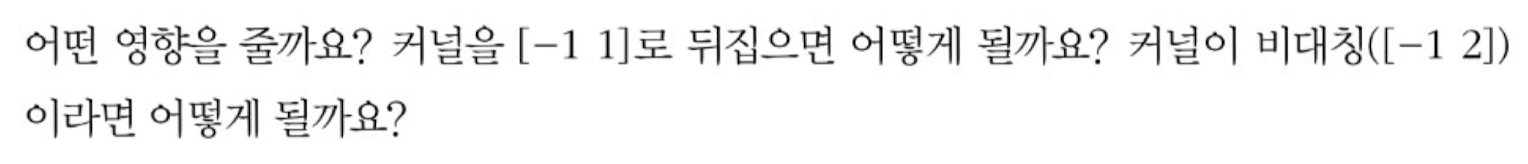

### 1. 시계열 생성 코드 구현

In [85]:
kernel = np.array([-1, 1])

ts = np.zeros(30)
ts[10:20] = 1

ts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 2. 신호의 시점에 대해 for loop

In [93]:
result = []

for i in range(len(ts)-2):
  result.append(np.dot(ts[i:i+2], kernel))

result

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

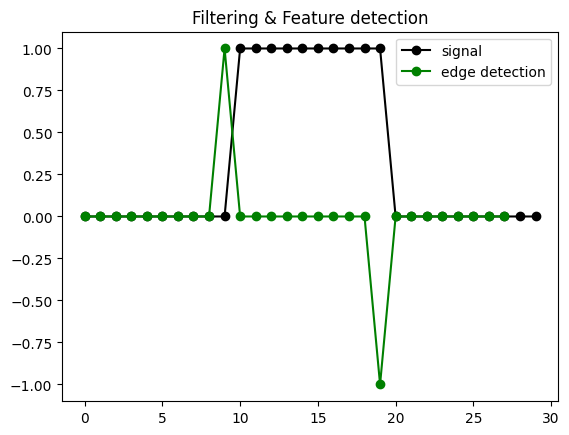

In [101]:
plt.plot(ts, 'ko-', label = 'signal')
plt.plot(result, 'go-', label = 'edge detection')
plt.title('Filtering & Feature detection')
plt.legend()

plt.show()

### CASE2: 커널 앞 뒤에 0이 추가된 형태 (i.e., `[0, -1, 1, 0]`)

In [102]:
kernel2 = np.array([0, -1, 1, 0])

In [106]:
result2 = []

for i in range(len(ts)-4):
  result2.append(np.dot(ts[i:i+4], kernel2))

result2

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

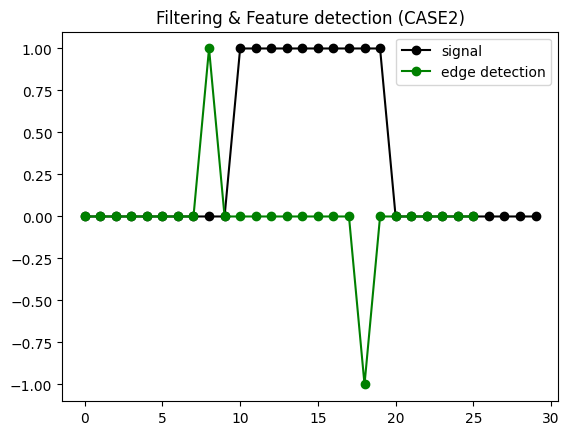

In [107]:
plt.plot(ts, 'ko-', label = 'signal')
plt.plot(result2, 'go-', label = 'edge detection')
plt.title('Filtering & Feature detection (CASE2)')
plt.legend()

plt.show()

### CASE3: 커널을 뒤집은 형태 (i.e., `[1, -1]`)

In [108]:
kernel3 = np.array([1, -1])

In [109]:
result3 = []

for i in range(len(ts)-2):
  result3.append(np.dot(ts[i:i+2], kernel3))

result3

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

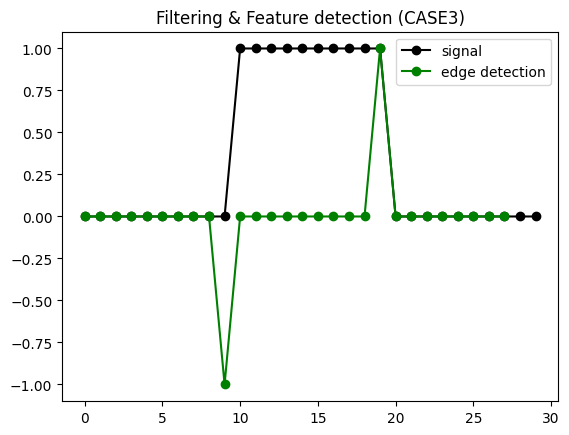

In [110]:
plt.plot(ts, 'ko-', label = 'signal')
plt.plot(result3, 'go-', label = 'edge detection')
plt.title('Filtering & Feature detection (CASE3)')
plt.legend()

plt.show()

### CASE4: 커널이 비대칭인 형태 (i.e., `[-1, 2]`)

In [113]:
kernel4 = np.array([-1, 2])

In [114]:
result4 = []

for i in range(len(ts)-2):
  result4.append(np.dot(ts[i:i+2], kernel4))

result4

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

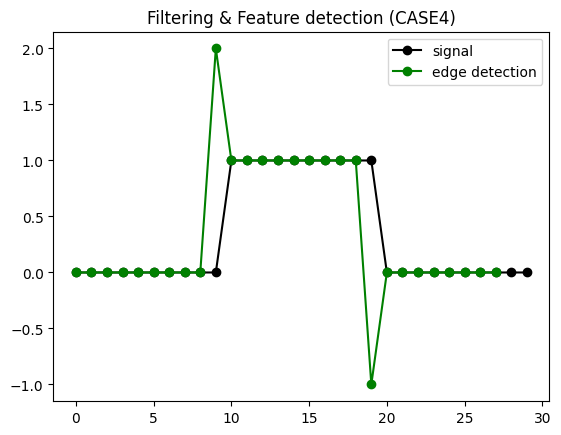

In [115]:
plt.plot(ts, 'ko-', label = 'signal')
plt.plot(result4, 'go-', label = 'edge detection')
plt.title('Filtering & Feature detection (CASE4)')
plt.legend()

plt.show()

### CASE 비교

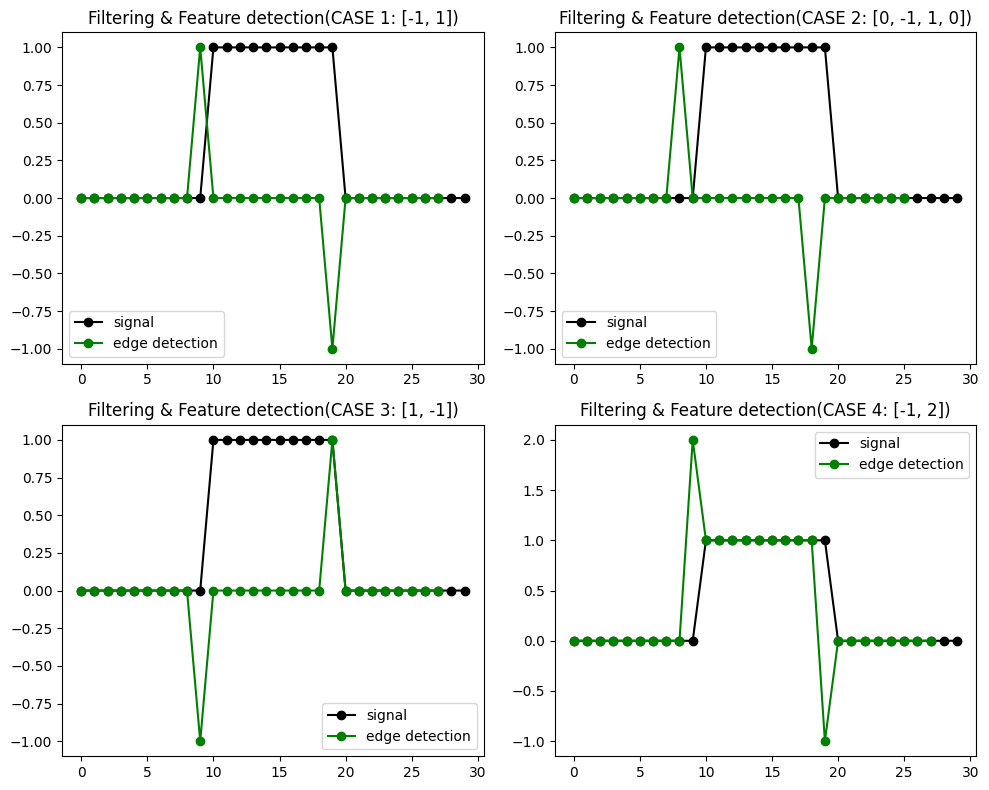

In [120]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(ts, 'ko-', label = 'signal')
plt.plot(result, 'go-', label = 'edge detection')
plt.title('Filtering & Feature detection(CASE 1: [-1, 1])')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(ts, 'ko-', label = 'signal')
plt.plot(result2, 'go-', label = 'edge detection')
plt.title('Filtering & Feature detection(CASE 2: [0, -1, 1, 0])')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(ts, 'ko-', label = 'signal')
plt.plot(result3, 'go-', label = 'edge detection')
plt.title('Filtering & Feature detection(CASE 3: [1, -1])')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(ts, 'ko-', label = 'signal')
plt.plot(result4, 'go-', label = 'edge detection')
plt.title('Filtering & Feature detection(CASE 4: [-1, 2])')
plt.legend()

plt.tight_layout()
plt.show()